this notebook will try to segment audio and check if the frequency could be similiar wihtin these segmentations

In [1]:
! conda install pydub -y -qqq

Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: ...working... done

# All requested packages already installed.



In [1]:
import librosa
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
from pydub import AudioSegment
import numpy as np
import os
import glob

In [2]:
! mkdir ./temp

mkdir: ./temp: File exists


In [3]:
# load ogg file

audio_path='../../data/train/asbfly/XC134896.ogg'

audio = AudioSegment.from_ogg(audio_path)

print(audio)

# audio duration
duration_seconds=len(audio)/1000.0

print(duration_seconds)

original_frame_rate = audio.frame_rate

print(original_frame_rate)

# Set the number of milliseconds for each segment, for example, every 5 seconds is divided into a segment
segment_duration = 5 * 1000  # 5 seconds in milliseconds

# Segment processing
segments = [audio[i:i + segment_duration] for i in range(0, len(audio), segment_duration)]


# Save each segment as a new file
for idx, segment in enumerate(segments):
    output_path = os.path.join('temp', f"segment_{idx}.ogg")
    segment.export(
        output_path,
        format="ogg",
        codec="libopus",
        parameters=["-ar", str(48000)]  # Set the sampling rate. The sampling rates applicable to libopus are usually 8000, 12000, 16000, 24000, 48000 Hz
    )

27.35
32000


**Delete the `temp` folder after finishing the notebook**

In [91]:
def timeD_to_freD(file_path):
    """
    convert audio data from time domain to frequency domain
    """
    y, sr =librosa.load(file_path,sr=None)

    fft = np.fft.fft(y)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    ## extract each cate name from path
    cate_name=file_path.split('/')[-1]


    # Step 3: Draw the audio waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1) 
    plt.plot(y)
    plt.title(f'time domain--{cate_name}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Step 4: Plot the Spectrum
    half_len = len(magnitude) // 2
    plt.subplot(2, 1, 2)
    plt.plot(frequency[:half_len], magnitude[:half_len])
    plt.title(f'frequency domain--{cate_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

    plt.close()

In [92]:
# list all audio slices paths
audio_slices=glob.glob('./temp/*.ogg')

print(audio_slices)

['./temp/segment_4.ogg', './temp/segment_5.ogg', './temp/segment_1.ogg', './temp/segment_0.ogg', './temp/segment_2.ogg', './temp/segment_3.ogg']


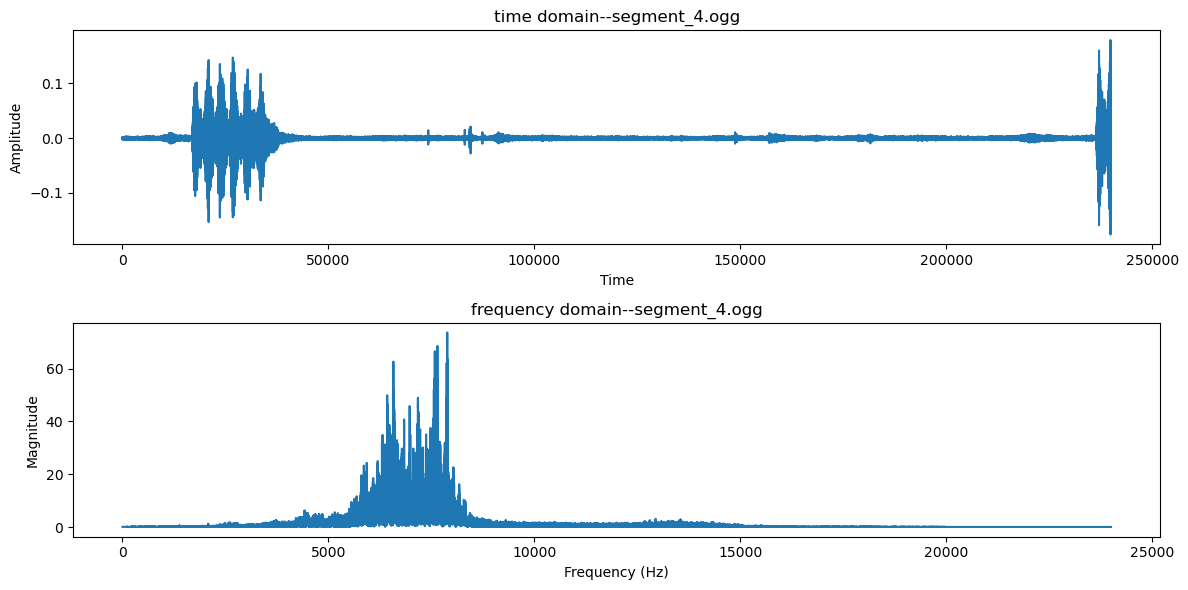

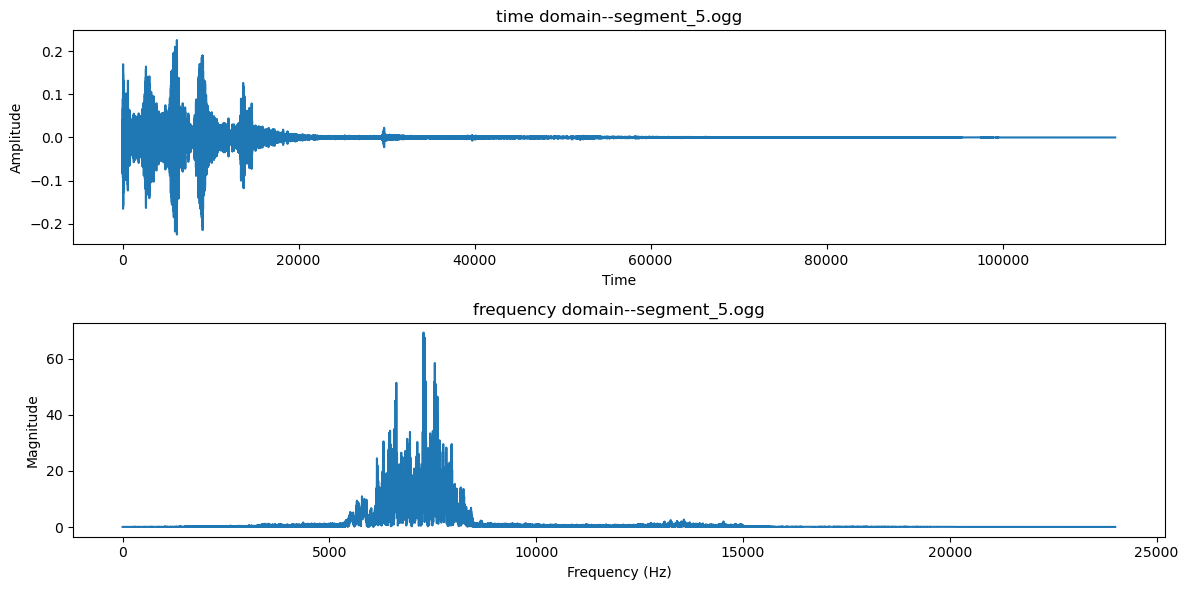

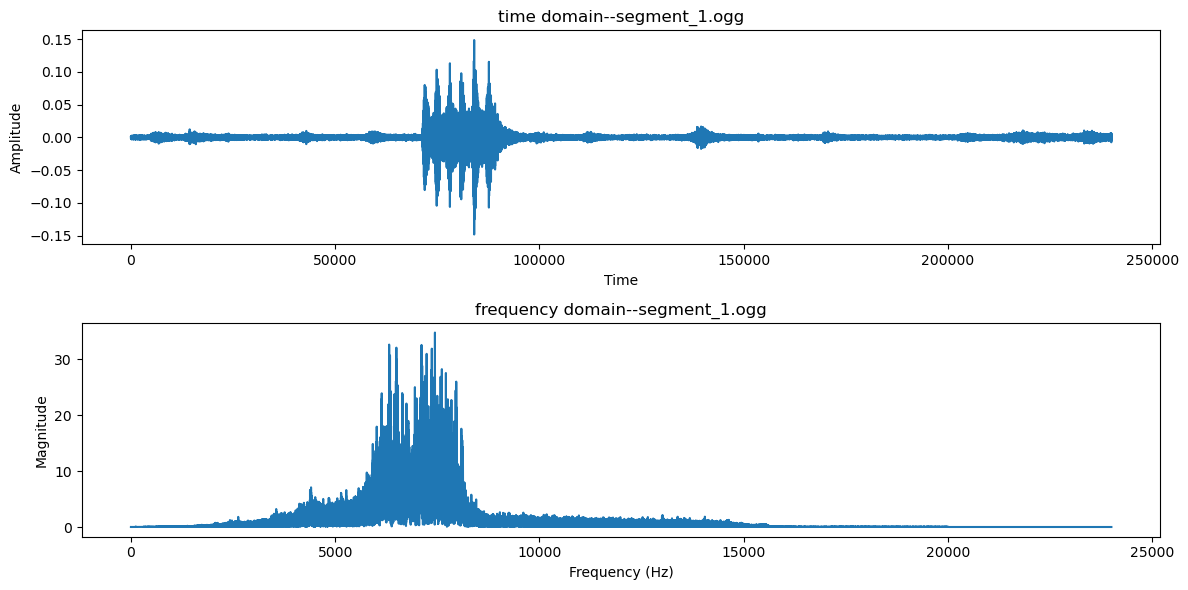

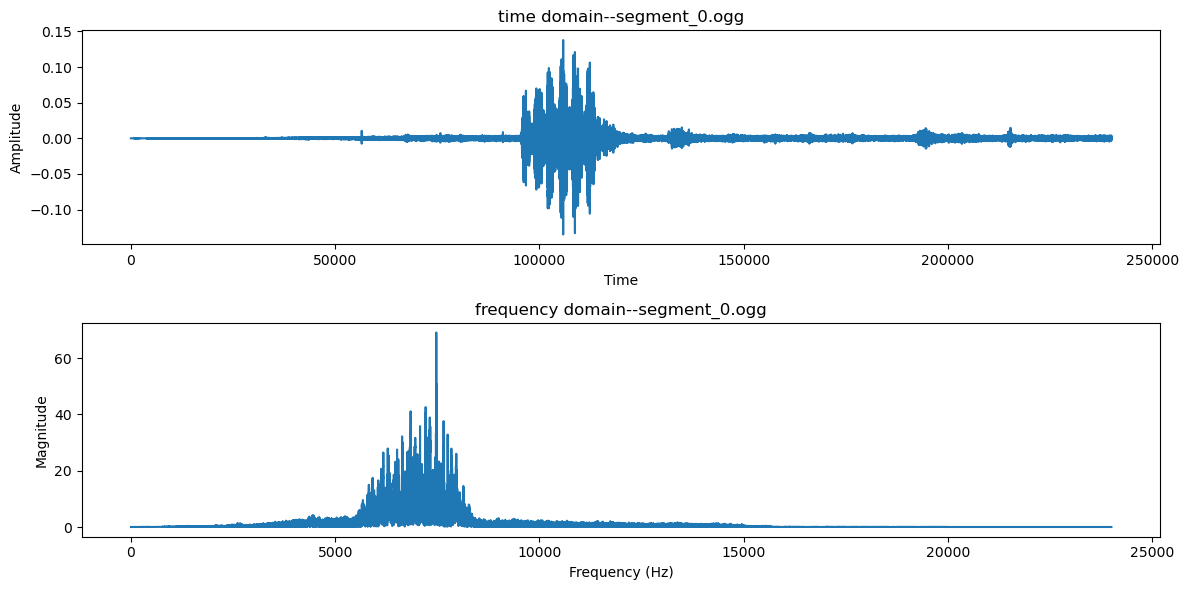

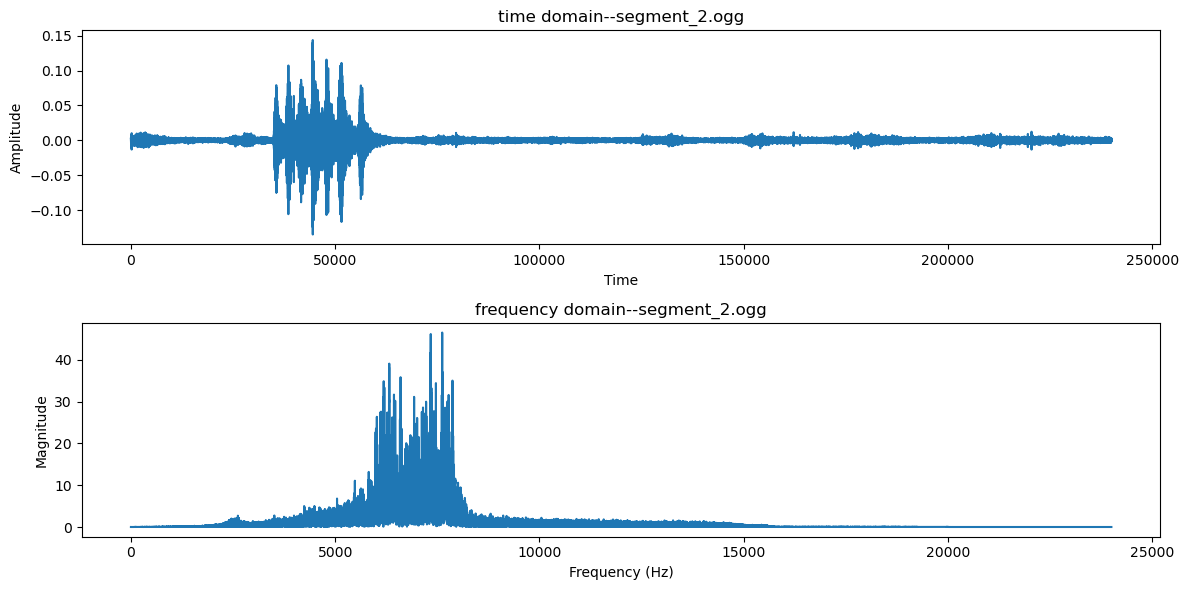

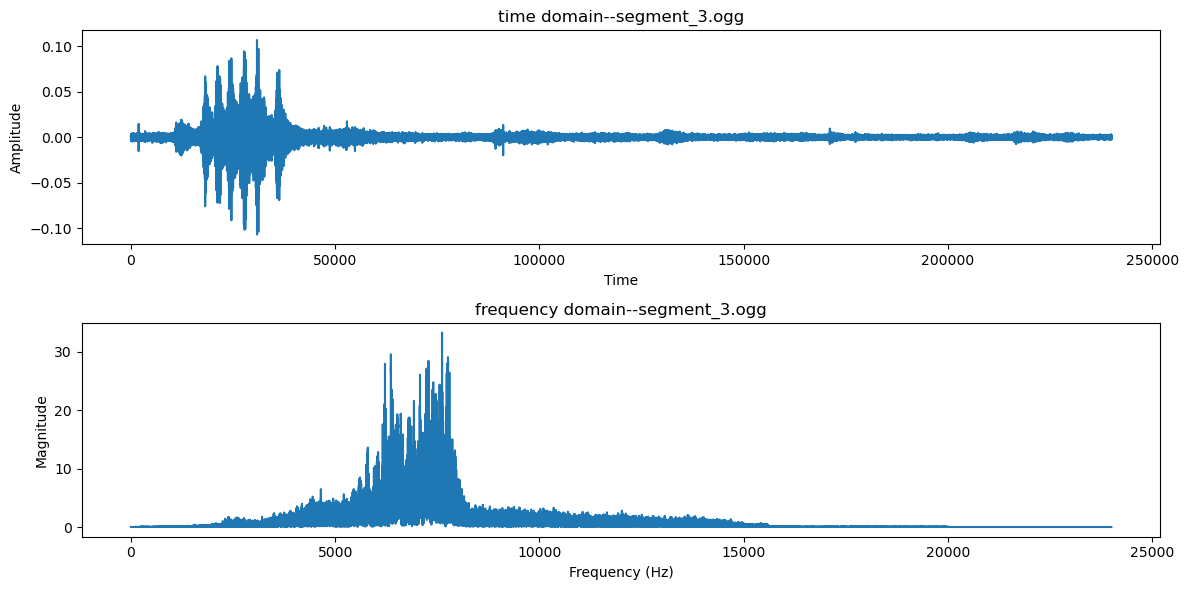

In [93]:
for audio_file in audio_slices:
    timeD_to_freD(audio_file)

**Because we want to ensure that the last slice could be complete, we need to ensure it will not be inconsistent with the previous length because it is not divisible.**

In [94]:
# check each slice's lengh

for audio_file in audio_slices:
    y, sr =librosa.load(audio_file,sr=None)
    print(audio_file)
    print(len(y))

./temp/segment_4.ogg
240000
./temp/segment_5.ogg
112800
./temp/segment_1.ogg
240000
./temp/segment_0.ogg
240000
./temp/segment_2.ogg
240000
./temp/segment_3.ogg
240000


**It is easy to find the last slice is incomplete.**

What I want is to extract slices of the same length from the end of the audio, although some will overlap.

In [95]:
# rewrite the function

# load ogg file

audio_path='../../data/train/asbfly/XC134896.ogg'

audio = AudioSegment.from_ogg(audio_path)

# audio duration
duration_seconds=len(audio)/1000.0

print(duration_seconds)

original_frame_rate = audio.frame_rate

print(original_frame_rate)

# Set the number of milliseconds for each segment, for example, every 30 seconds is divided into a segment
segment_duration = 5 * 1000  # 30 seconds in milliseconds

# Segment processing
segments = [audio[i:i + segment_duration] for i in range(0, len(audio), segment_duration)]


# Save each segment as a new file
for idx, segment in enumerate(segments[:-1]):
    output_path = os.path.join('temp', f"segment_{idx}.ogg")
    segment.export(
        output_path,
        format="ogg",
        codec="libopus",
        parameters=["-ar", str(48000)]  # Set the sampling rate. The sampling rates applicable to libopus are usually 8000, 12000, 16000, 24000, 48000 Hz
    )

last_segment=audio[len(audio)-segment_duration:len(audio)]

output_path = os.path.join('temp', f"segment_{len(segments)-1}.ogg")
last_segment.export(
    output_path,
    format="ogg",
    codec="libopus",
    parameters=["-ar", str(48000)] 
)


27.35
32000


<_io.BufferedRandom name='temp/segment_5.ogg'>

In [96]:
# list all audio slices paths
audio_slices=glob.glob('./temp/*.ogg')

print(audio_slices)

['./temp/segment_4.ogg', './temp/segment_5.ogg', './temp/segment_1.ogg', './temp/segment_0.ogg', './temp/segment_2.ogg', './temp/segment_3.ogg']


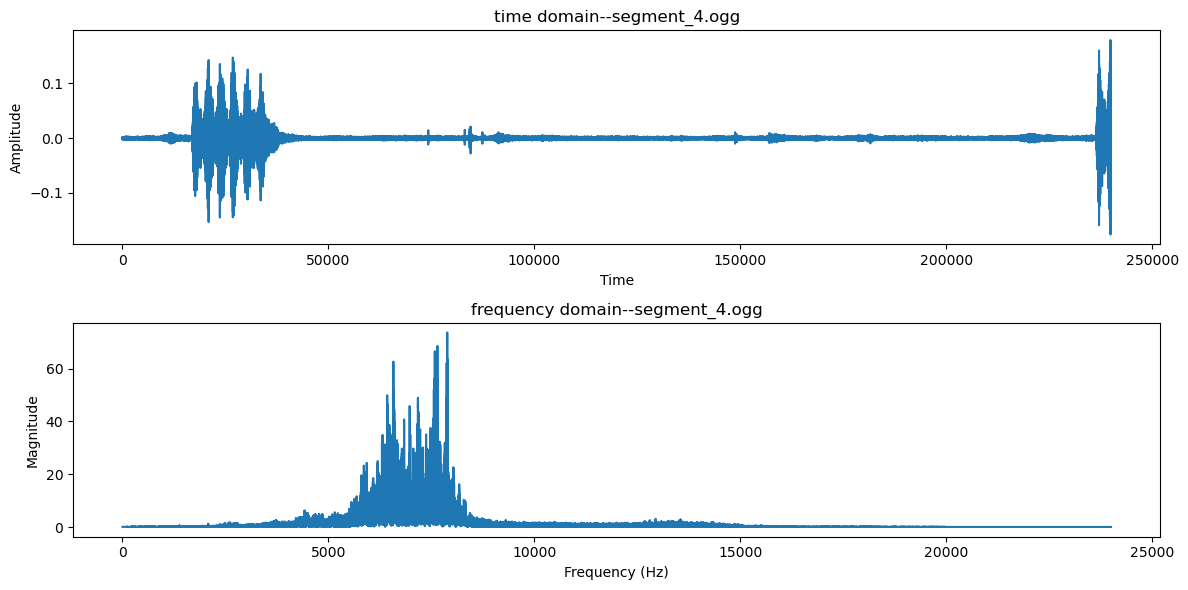

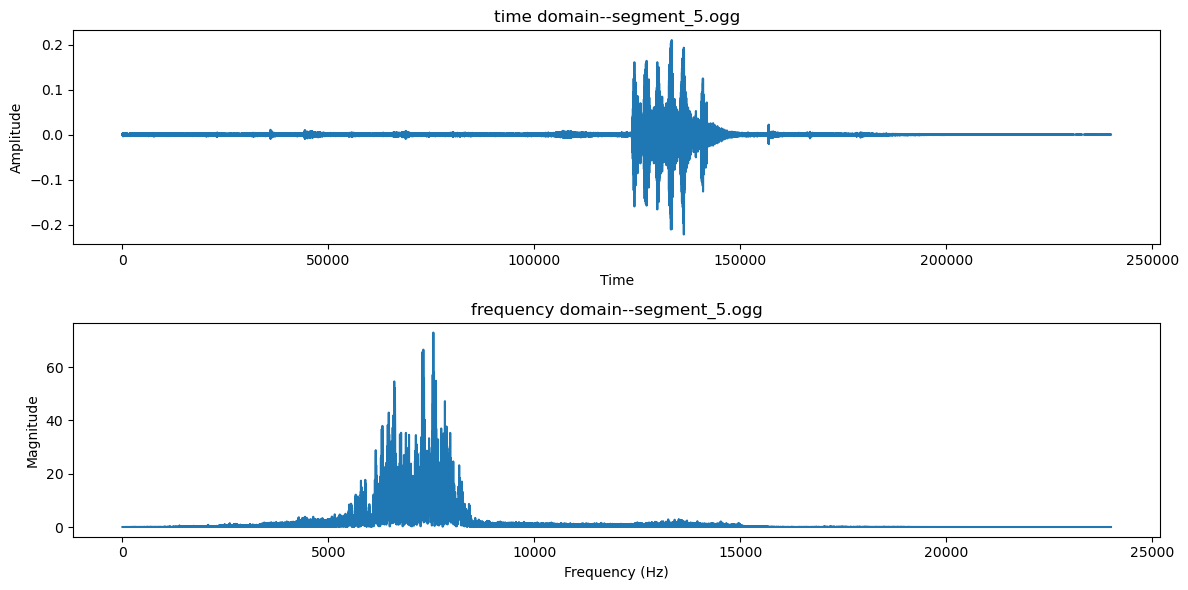

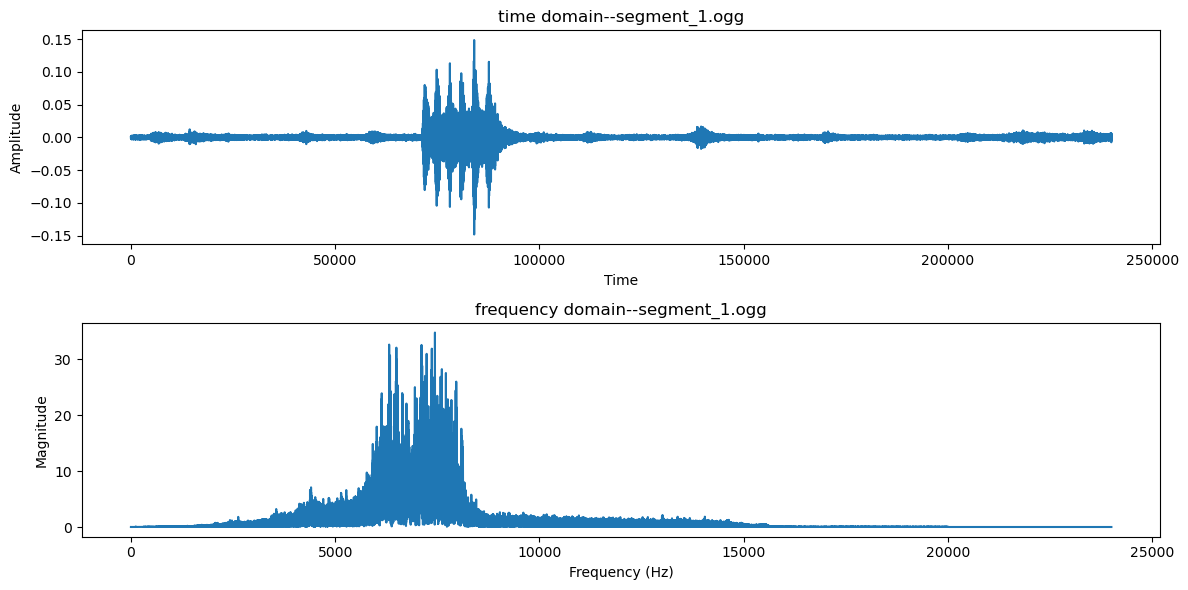

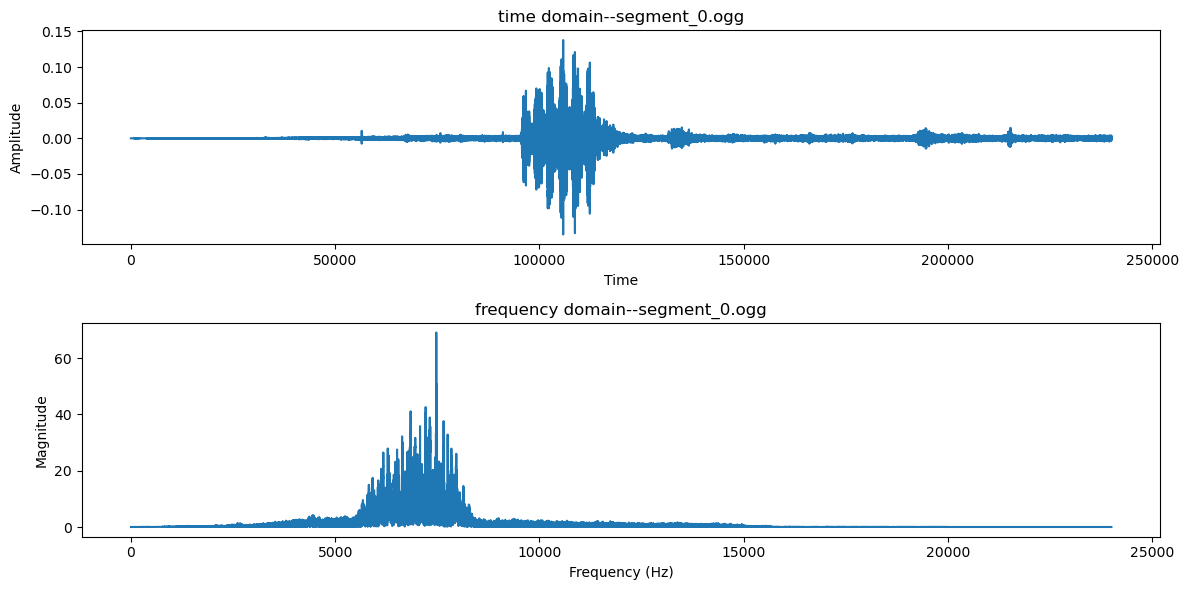

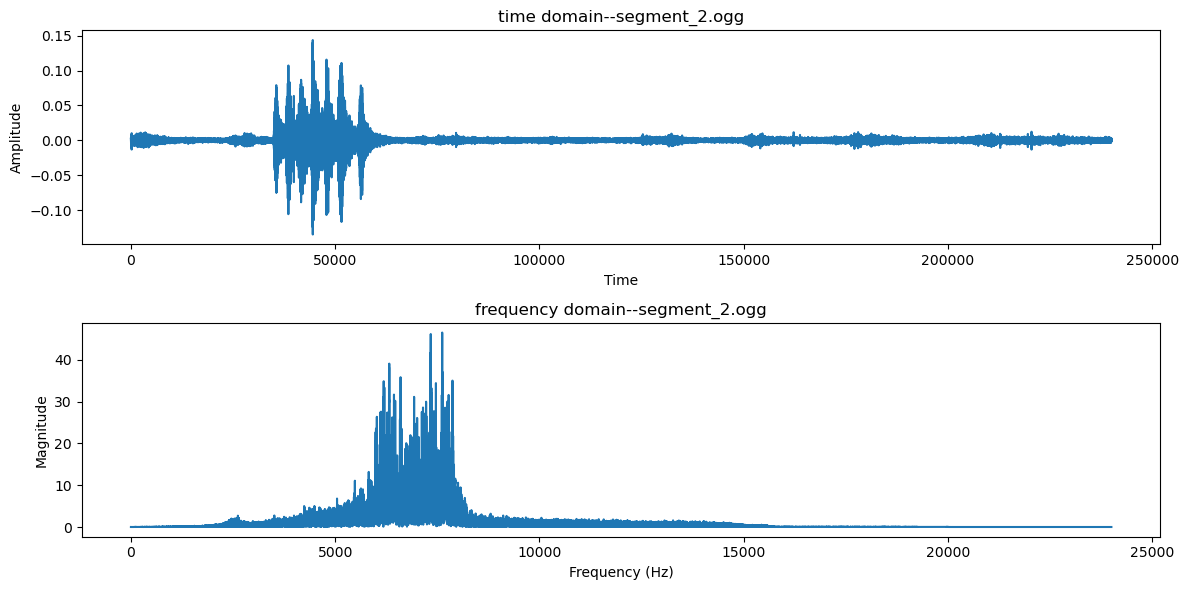

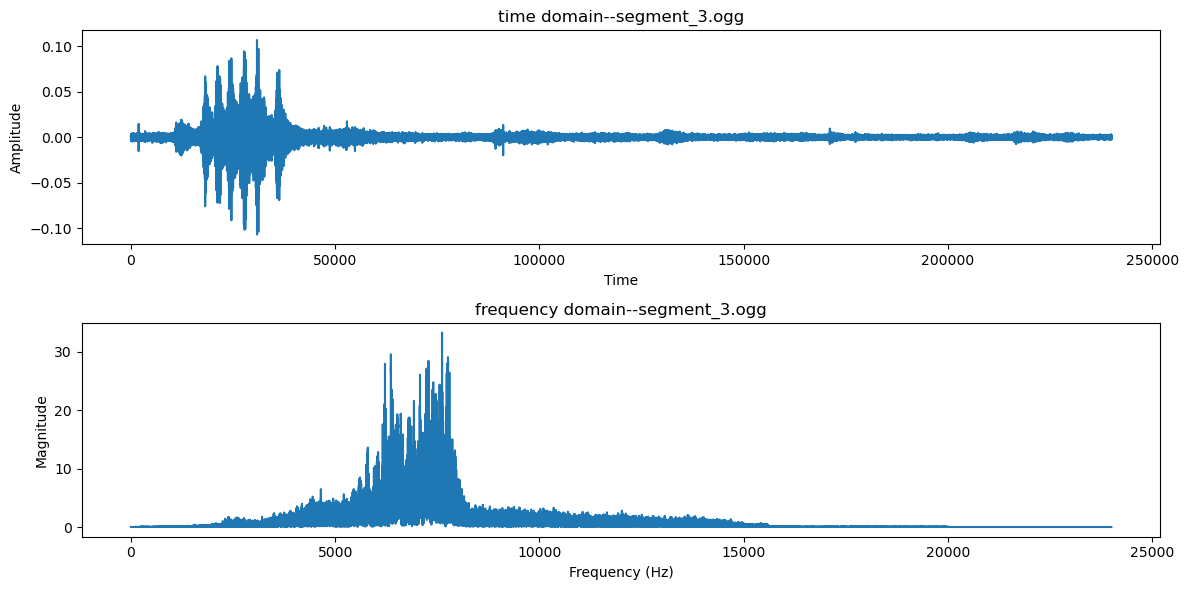

In [97]:
for audio_file in audio_slices:
    timeD_to_freD(audio_file)

In [98]:
# check each slice's lengh

for audio_file in audio_slices:
    y, sr =librosa.load(audio_file,sr=None)
    print(audio_file)
    print(len(y))

./temp/segment_4.ogg
240000
./temp/segment_5.ogg
240000
./temp/segment_1.ogg
240000
./temp/segment_0.ogg
240000
./temp/segment_2.ogg
240000
./temp/segment_3.ogg
240000


**I want to have a look if I choose 1 seconds for each slice**

In [105]:
# rewrite the function

# load ogg file

audio_path='../../data/train/asbfly/XC134896.ogg'

audio = AudioSegment.from_ogg(audio_path)

# audio duration
duration_seconds=len(audio)/1000.0

print(duration_seconds)

original_frame_rate = audio.frame_rate

print(original_frame_rate)

# Set the number of milliseconds for each segment, for example, one segment per second
segment_duration = 2 * 1000  # 1 seconds in milliseconds

# Segment processing
segments = [audio[i:i + segment_duration] for i in range(0, len(audio), segment_duration)]


# Save each segment as a new file
for idx, segment in enumerate(segments[:-1]):
    output_path = os.path.join('temp', f"segment_{idx}.ogg")
    segment.export(
        output_path,
        format="ogg",
        codec="libopus",
        parameters=["-ar", str(48000)]  
    )

last_segment=audio[len(audio)-segment_duration:len(audio)]

output_path = os.path.join('temp', f"segment_{len(segments)-1}.ogg")
last_segment.export(
    output_path,
    format="ogg",
    codec="libopus",
    parameters=["-ar", str(48000)] 
)


27.35
32000


<_io.BufferedRandom name='temp/segment_13.ogg'>

In [106]:
# list all audio slices paths
audio_slices=glob.glob('./temp/*.ogg')

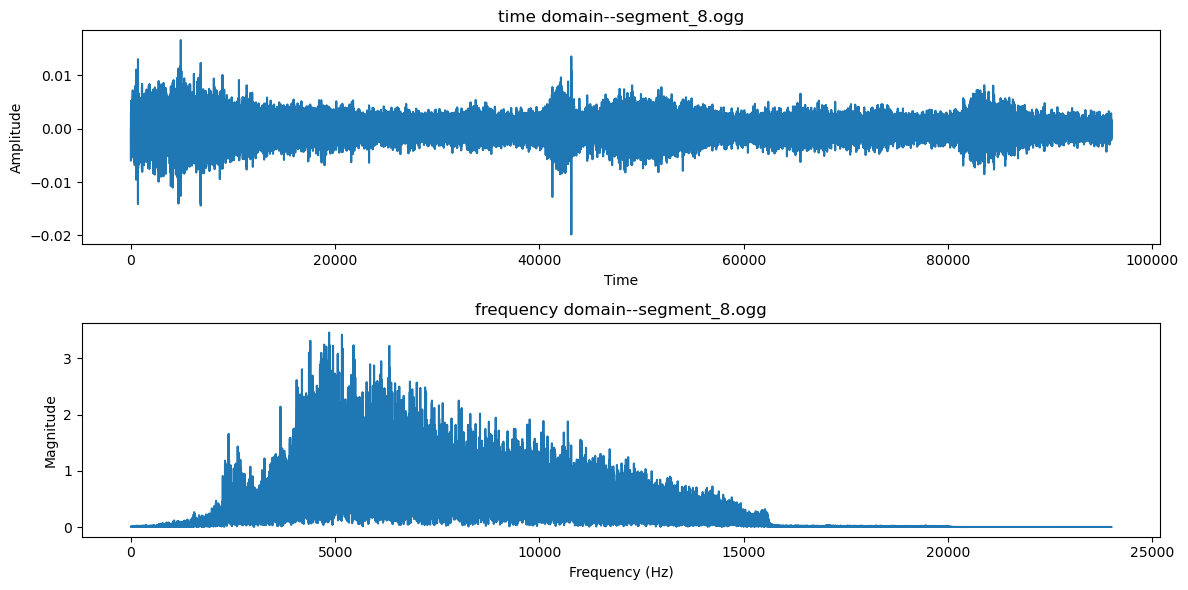

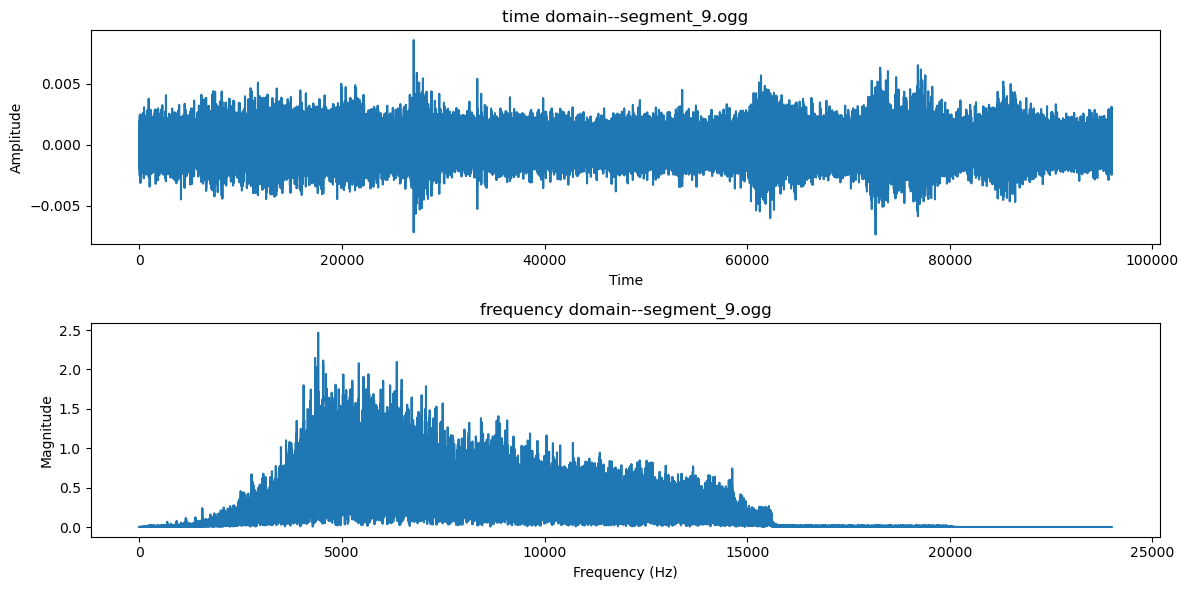

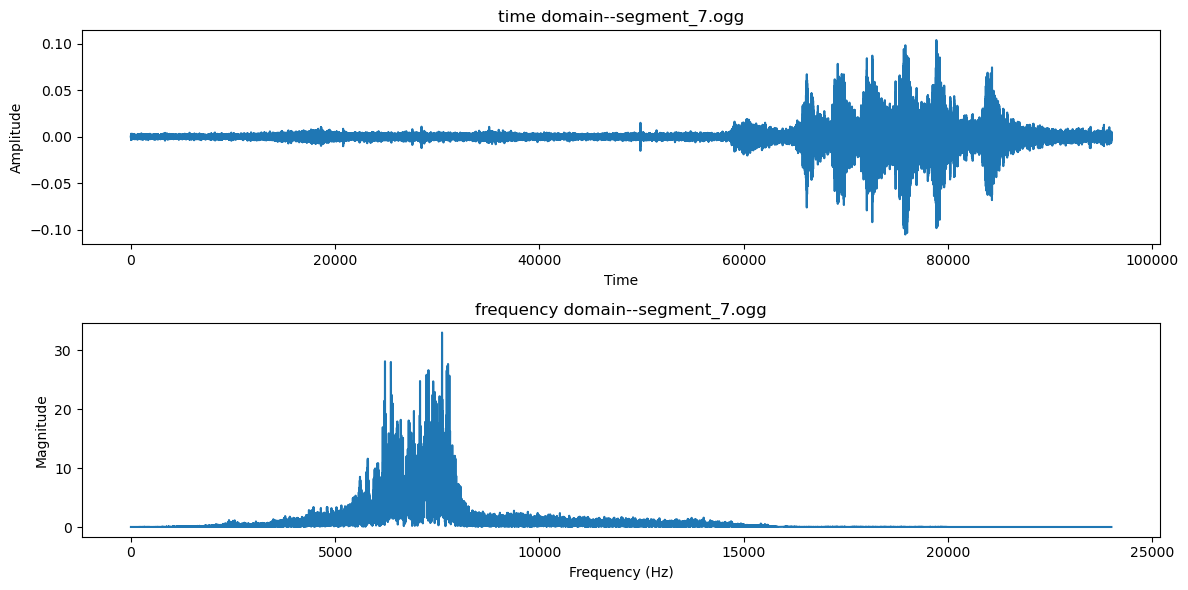

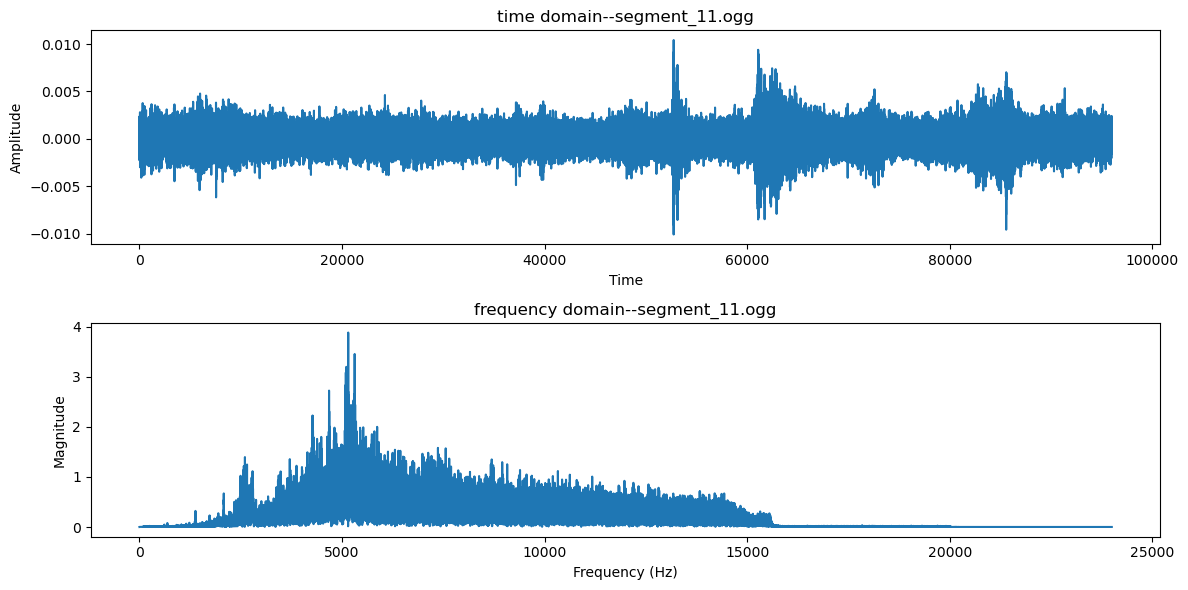

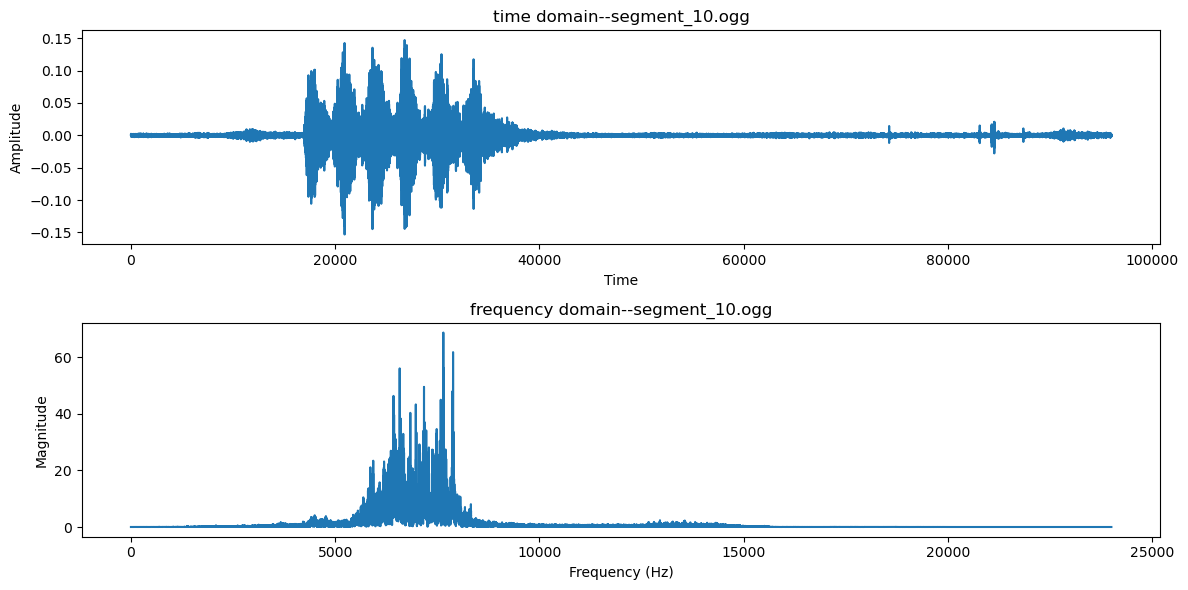

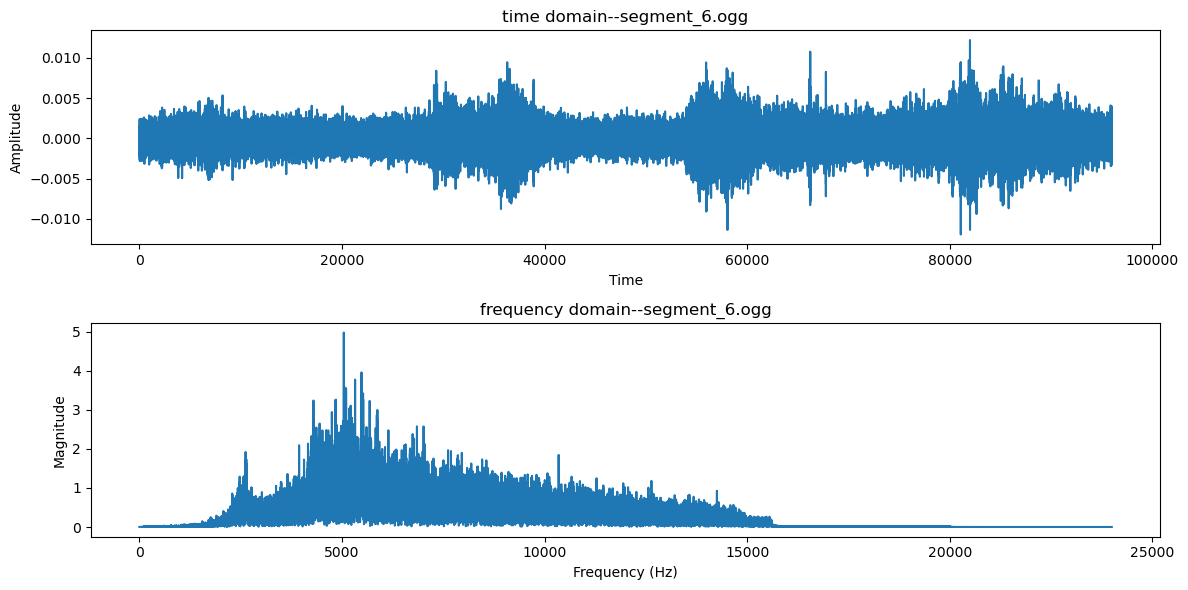

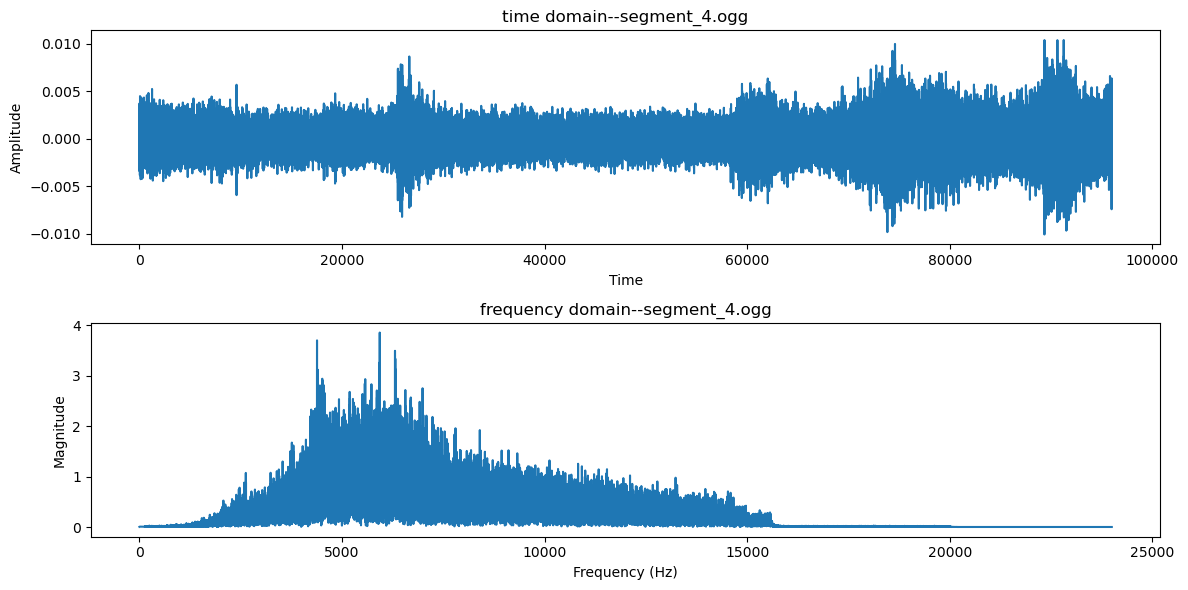

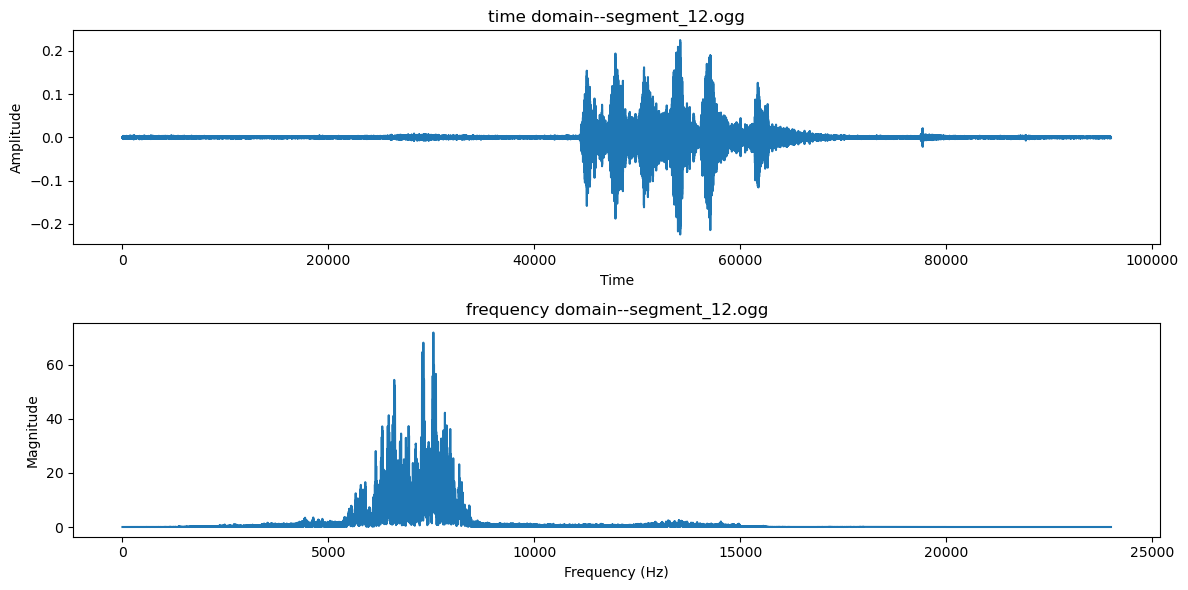

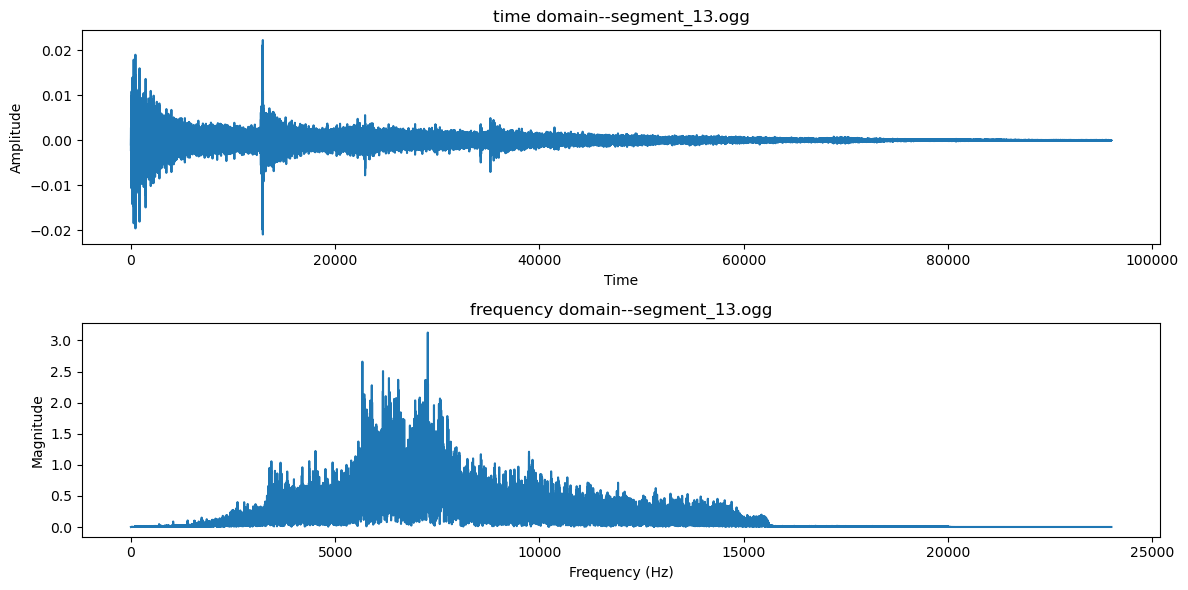

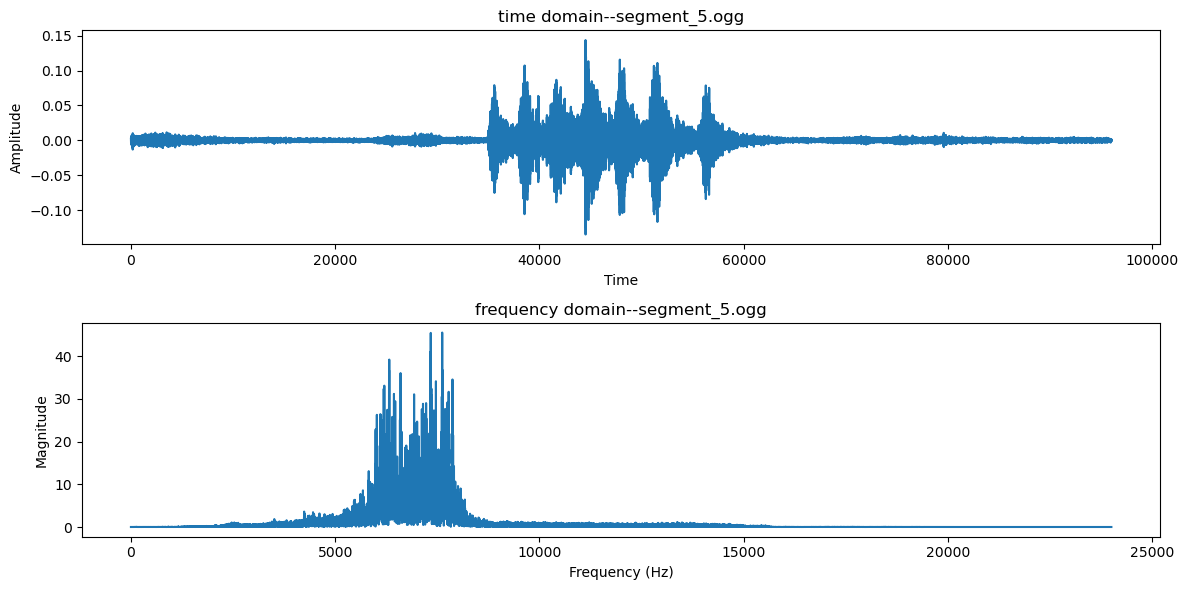

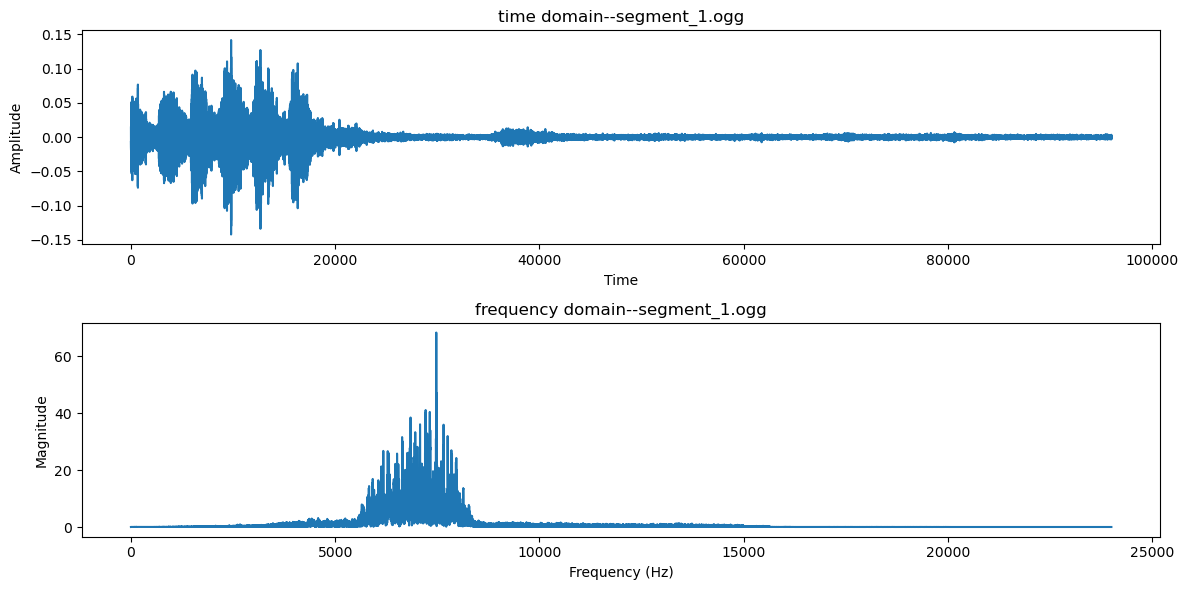

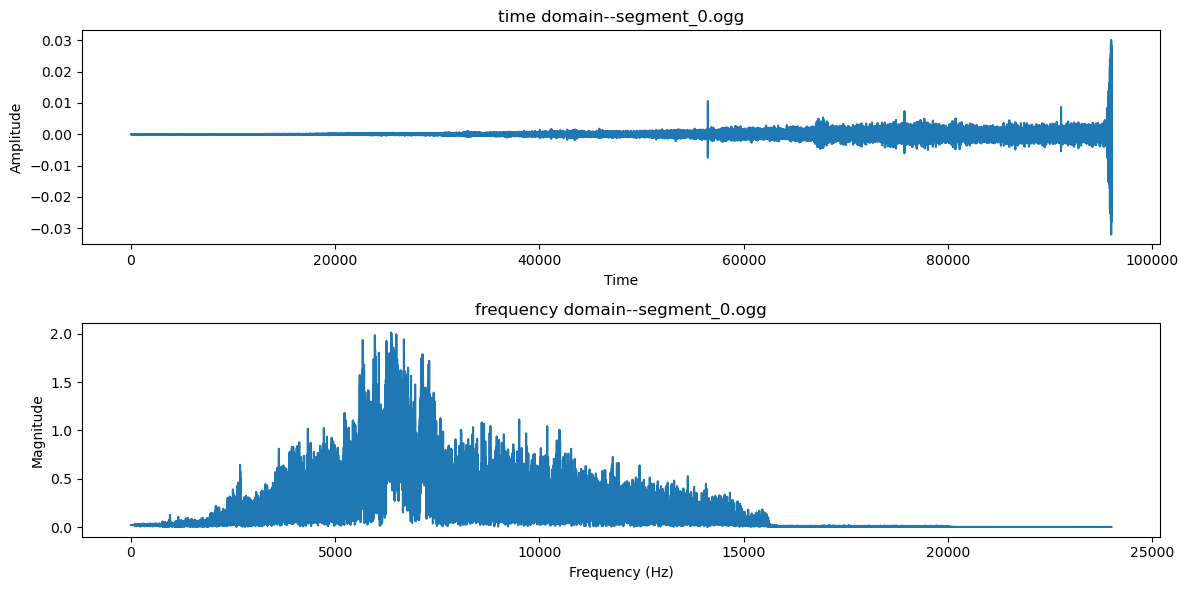

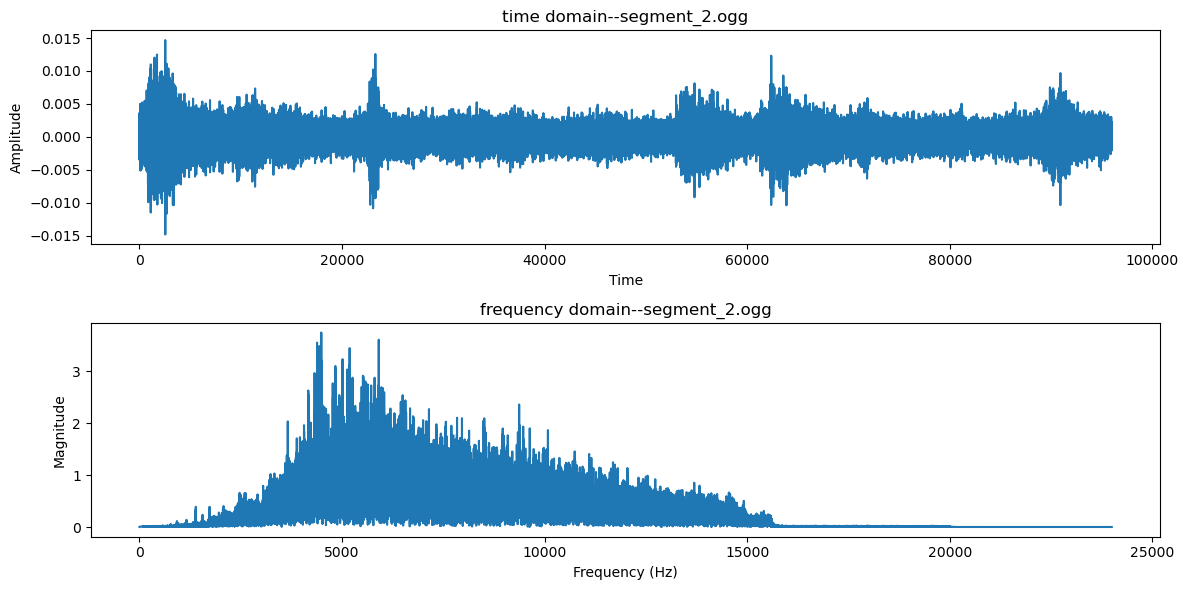

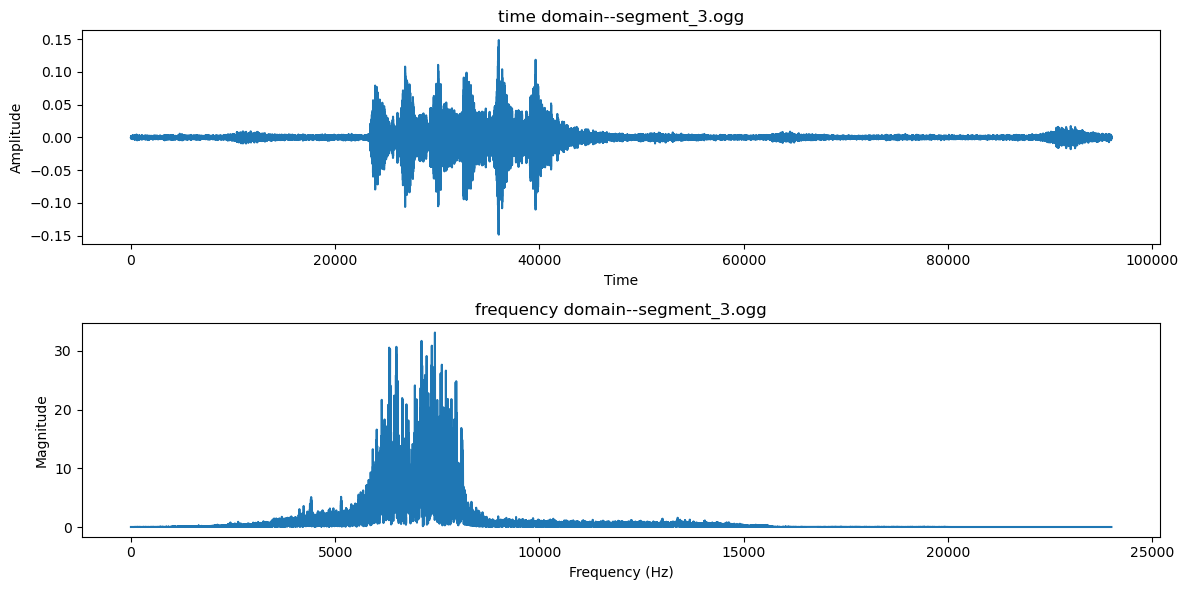

In [107]:
for audio_file in audio_slices:
    timeD_to_freD(audio_file)